In [2]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

plt.rcParams['figure.dpi'] = 150

cm = 1.5/2.54 #define ratio for cm and inches

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_2_salt'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [4]:
wavelength = [] #Wavelength list
absorbtion = [] # Intensity list


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=1)
    wavelength.append(Data[:, 0])
    absorbtion.append(Data[:, 1]) 

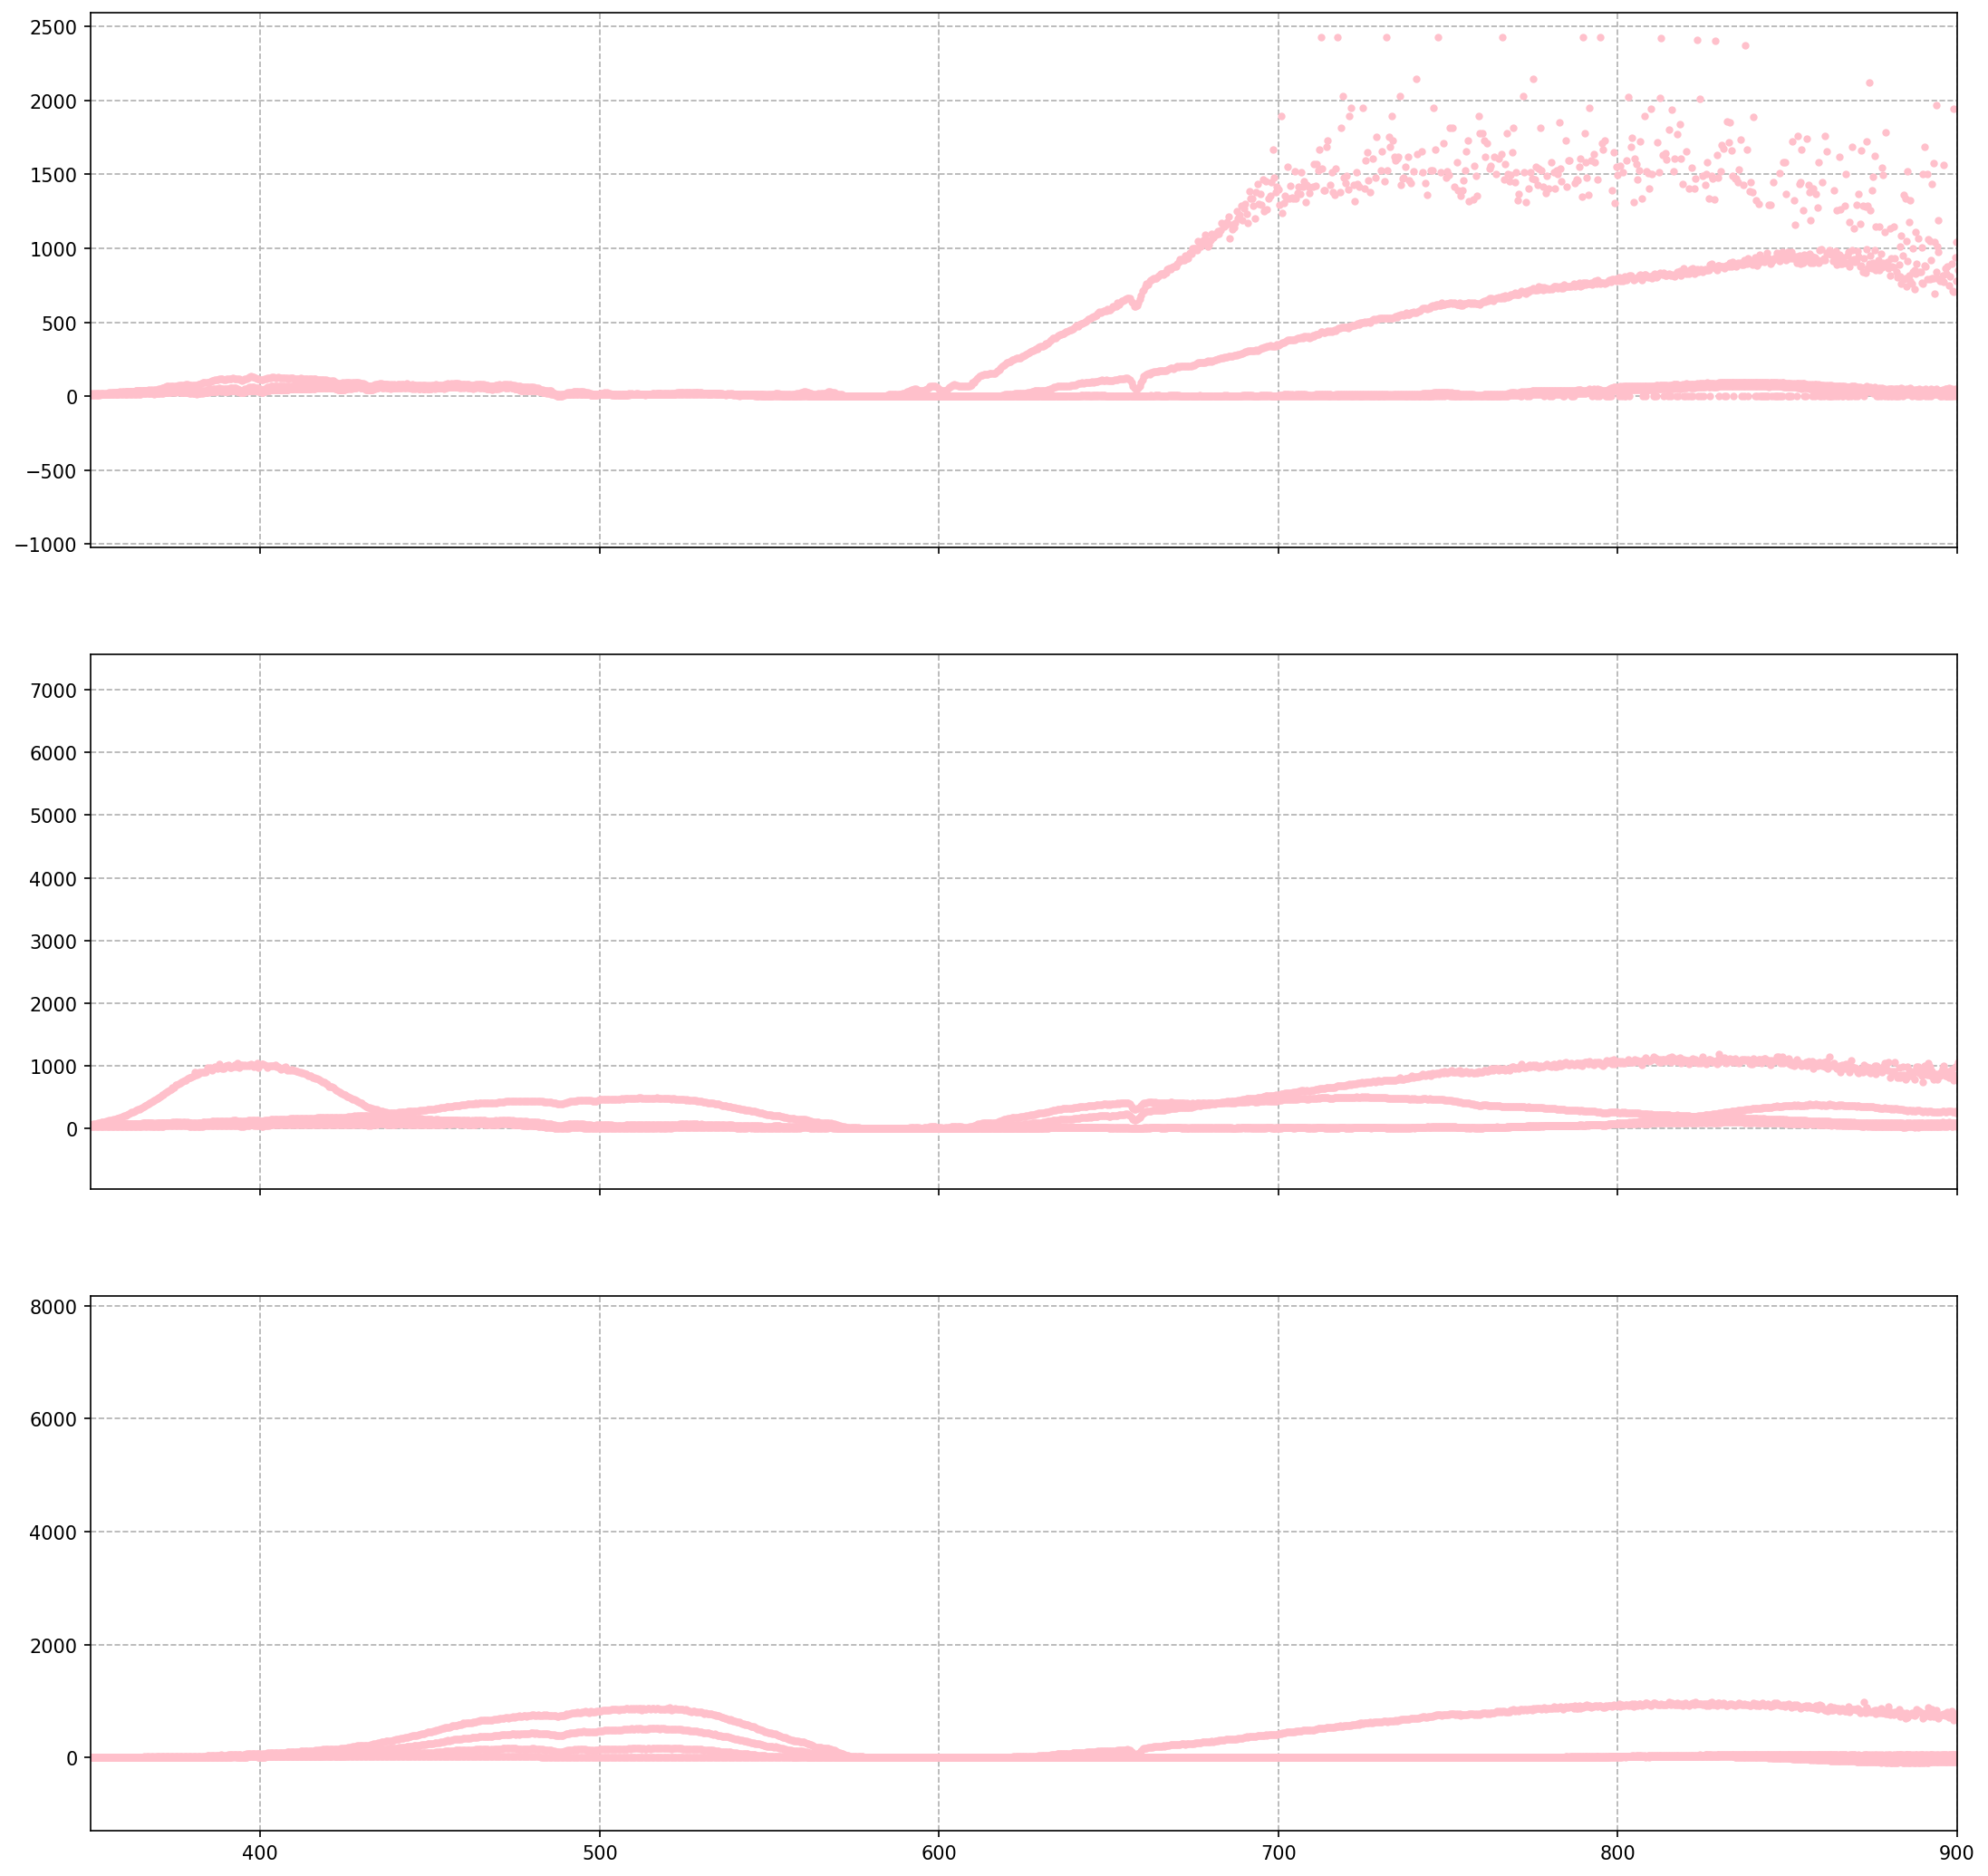

In [22]:
#Plot for B substance

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30*cm, 30*cm), sharex = True)

n = 0.2
l = 0.01

c = n * l
#c = 1

for i, Data_name in enumerate(Data_names):
    if i <= 3:
        ax1.plot(wavelength[i], absorbtion[i]/c, '.', color = 'pink', label = 'BX')
        ax1.grid(ls = '--')
        ax1.set_xlim((350, 900))
    elif 4 <= i <= 7:
        ax2.plot(wavelength[i], absorbtion[i]/c, '.', color = 'pink', label = 'GX')
        ax2.grid(ls = '--')
    elif 9 <= i <= len(Data_names):
        ax3.plot(wavelength[i], absorbtion[i]/c, '.', color = 'pink', label = 'RX')
        ax3.grid(ls = '--')   